In [1]:
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from tensorflow.keras import layers, models
from tensorflow.keras.preprocessing.image import ImageDataGenerator,load_img, img_to_array
from sklearn.metrics import confusion_matrix, classification_report

In [2]:
train_data = 'dataset' 

In [3]:
img_height, img_width = 400, 400  # Use the pixel size of your images
batch_size = 32
num_classes = 3 # 3 characters 

In [4]:
train_datagen = ImageDataGenerator(
    rescale=1./255,
    validation_split=0.2 
)

In [5]:
train_generator = train_datagen.flow_from_directory(
    train_data,
    target_size=(img_height, img_width), # All images are resized to specified dimensions
    batch_size=batch_size, 
    class_mode='categorical', # For multi-class classification
    subset='training'
)

Found 276 images belonging to 3 classes.


In [6]:
validation_generator = train_datagen.flow_from_directory(
    train_data,
    target_size=(img_height, img_width),
    batch_size=batch_size,
    class_mode='categorical',
    subset='validation'
)

Found 68 images belonging to 3 classes.


In [7]:
model = models.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(img_height, img_width, 3)),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(128, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(256, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(128, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Flatten(),
    layers.Dense(64,activation='relu'),
    layers.Dense(num_classes, activation='softmax')  
]) # Model

In [8]:
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy']) 

In [9]:
epochs = 6 
history = model.fit(
    train_generator,
    steps_per_epoch=train_generator.samples // batch_size,
    epochs=epochs,
    validation_data=validation_generator,
    validation_steps=validation_generator.samples // batch_size
)

Epoch 1/6
8/8 [==============================] - 79s 10s/step - loss: 1.0954 - accuracy: 0.4139 - val_loss: 1.0520 - val_accuracy: 0.3438
Epoch 2/6
8/8 [==============================] - 62s 8s/step - loss: 0.8445 - accuracy: 0.5738 - val_loss: 0.9174 - val_accuracy: 0.5469
Epoch 3/6
8/8 [==============================] - 56s 7s/step - loss: 0.6260 - accuracy: 0.6598 - val_loss: 0.8240 - val_accuracy: 0.5938
Epoch 4/6
8/8 [==============================] - 55s 7s/step - loss: 0.3907 - accuracy: 0.7746 - val_loss: 0.4065 - val_accuracy: 0.8594
Epoch 5/6
8/8 [==============================] - 55s 7s/step - loss: 0.2384 - accuracy: 0.8730 - val_loss: 0.3653 - val_accuracy: 0.7656
Epoch 6/6
8/8 [==============================] - 54s 7s/step - loss: 0.1314 - accuracy: 0.9385 - val_loss: 0.3091 - val_accuracy: 0.9219


In [10]:
# Final Evaluation 
test_loss, test_accuracy = model.evaluate(validation_generator)
print(f"Validation Accuracy: {test_accuracy}")

3/3 [==============================] - 4s 899ms/step - loss: 0.2991 - accuracy: 0.9265
Validation Accuracy: 0.9264705777168274


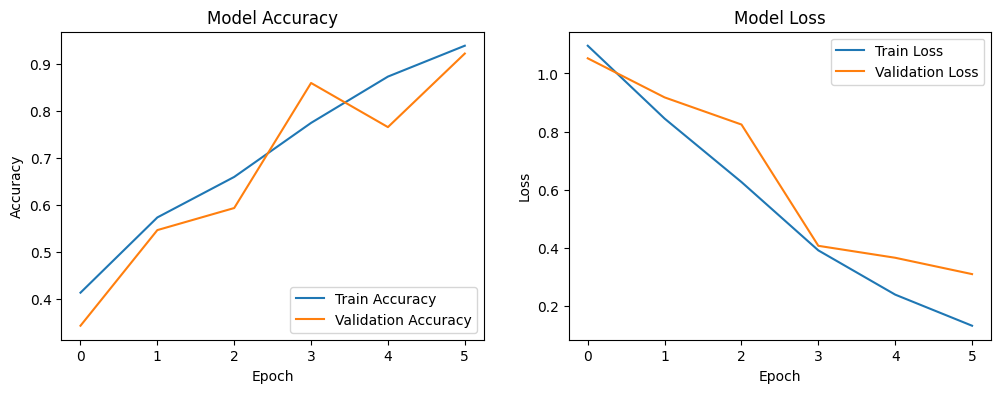

In [11]:
def plot_history(history):
    plt.figure(figsize=(12, 4))
    plt.subplot(1, 2, 1)
    plt.plot(history.history['accuracy'], label='Train Accuracy')
    plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
    plt.title('Model Accuracy')
    plt.ylabel('Accuracy')
    plt.xlabel('Epoch')
    plt.legend(loc='lower right')

    plt.subplot(1, 2, 2)
    plt.plot(history.history['loss'], label='Train Loss')
    plt.plot(history.history['val_loss'], label='Validation Loss')
    plt.title('Model Loss')
    plt.ylabel('Loss')
    plt.xlabel('Epoch')
    plt.legend(loc='upper right')
    
    plt.show()

plot_history(history)

In [12]:
# 1. Get true labels and predictions
val_steps = validation_generator.samples // batch_size + 1 # Include all samples
Y_pred = model.predict(validation_generator, steps=val_steps)
y_pred_classes = np.argmax(Y_pred, axis=1) # Predicted classes

# Get true labels for all validation data
y_true = validation_generator.classes[:validation_generator.samples]

# 2. Get the index mapping from the generator (e.g., {'class_A': 0, 'class_B': 1, ...})
class_labels = list(validation_generator.class_indices.keys())

# 3. Create Confusion Matrix
conf_matrix = confusion_matrix(y_true, y_pred_classes)
print("\nConfusion Matrix:")
# Display as a DataFrame for better readability
conf_df = pd.DataFrame(conf_matrix, index=class_labels, columns=class_labels)
print(conf_df)

3/3 [==============================] - 4s 886ms/step

Confusion Matrix:
         Minun  Pikachu  Plusle
Minun        5       11       8
Pikachu     10        7       7
Plusle       8        8       4


In [13]:
# Generate Classification Report
report = classification_report(y_true, y_pred_classes, target_names=class_labels)
print("\nClassification Report:")
print(report)


Classification Report:
              precision    recall  f1-score   support

       Minun       0.22      0.21      0.21        24
     Pikachu       0.27      0.29      0.28        24
      Plusle       0.21      0.20      0.21        20

    accuracy                           0.24        68
   macro avg       0.23      0.23      0.23        68
weighted avg       0.23      0.24      0.23        68

